rank=45,points:[(0, 0), (1, 2), (1, 35), (5, 16), (5, 21), (6, 3), (6, 34), (8, 6), (8, 31), (9, 10), (9, 27), (10, 12), (10, 25), (11, 10), (11, 27), (12, 14), (12, 23), (16, 18), (16, 19), (17, 10), (17, 27), (19, 1), (19, 36), (20, 8), (20, 29), (21, 5), (21, 32), (22, 1), (22, 36), (26, 8), (26, 29), (28, 8), (28, 29), (30, 12), (30, 25), (31, 9), (31, 28), (33, 1), (33, 36), (34, 12), (34, 25), (35, 11), (35, 26), (36, 7), (36, 30)]


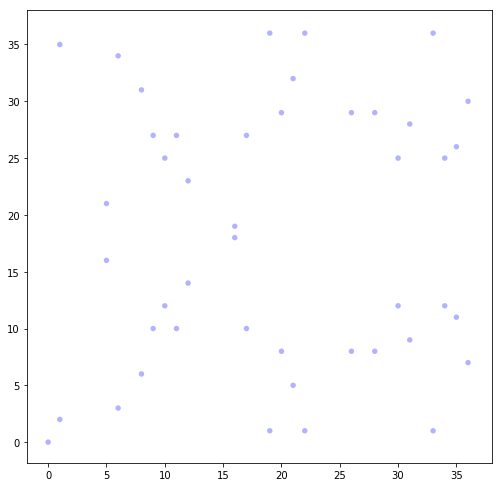

In [114]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
def EC_define(a,b,mod):
    return lambda x:(x**3+a*x+b) % mod
def EC_curve_f(x,curve,mod):
    yList = []
    y2 = curve(x)
    for i in range(mod-1):
        y = i+1
        if y**2 % mod == y2:
            yList.append(y)
    return yList
    
def getCurvePoints(a,b,p):
    ec_curve = EC_define(a,b,p)
    field = list(np.arange(p-1)+1)
    pointSet = [(0,0)]
    for v in field:
        yList = EC_curve_f(v,ec_curve,p)
        for y in yList:
            pointSet.append((v,y))
    return pointSet
def find_inverse_in_Fp(a,p):
    for i in range(p-1):
        if a * (i+1) % p == 1:
            return i+1
def Fp_divide(a,b,p):
    # calculate a/b in Fp
    b_inv = find_inverse_in_Fp(b,p)
    return a*b_inv % p
def curveAdd(a,b,mod,p1,p2):
    curve = EC_define(a,b,mod)
    (x1,y1) = p1
    (x2,y2) = p2
    #print(p1,p2)
    k = None
    m = None
    if x1==0 and y1 ==0:
        return p2
    elif x2==0 and y2 ==0:
        return p1
    elif x1==x2 and y1!=y2:
        return (0,0)
    elif x1==x2 and y1==y2 and y2==0:
        return (0,0)
    elif x1==x2 and y1==y2:
        k = Fp_divide(3*x1**2+a,2*y1,mod)
        m = Fp_divide(-x1**3+a*x1+2*b,2*y1,mod)
    elif x1!=x2:
        k = Fp_divide(y2-y1,x2-x1,mod)
        m = Fp_divide(y1*x2-x1*y2,x2-x1,mod)
    return ((k**2-(x1+x2)) % mod,(-(k**3)+k*(x1+x2)-m) % mod)


points = getCurvePoints(-5,8,37)
print('rank={0},points:{1}'.format(len(points),points))
fig, ax = plt.subplots()
DPI = fig.get_dpi()
fig.set_size_inches(600.0 / float(DPI), 600.0 / float(DPI))
for (x,y) in points:
    ax.scatter(x, y, c='blue', s=30.0, label='blue',
                   alpha=0.3, edgecolors='None')

size=15,generated points=[(1, 2), (26, 29), (22, 36), (11, 10), (36, 7), (34, 25), (5, 21), (5, 16), (34, 12), (36, 30), (11, 27), (22, 1), (26, 8), (1, 35), (0, 0)]


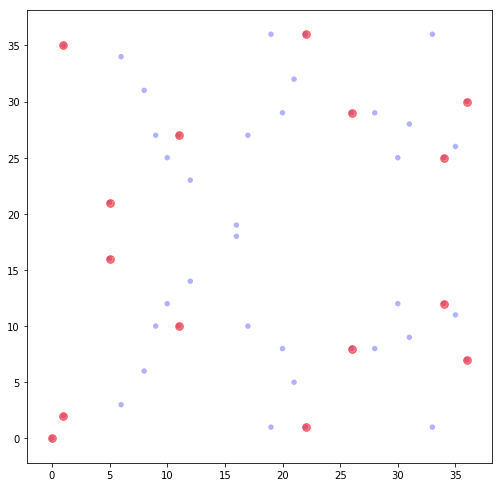

In [110]:
p1 = (1,2)
p2 = (6, 34)
#print(Fp_divide(10,4,37))
#print(Fp_divide(1,2,37))
p1GSet = [p1]
add = p1
for _ in range(45):
    add = curveAdd(-5,8,37,p1,add)
    if add not in p1GSet:
        p1GSet.append(add)
print('size={0},generated points={1}'.format(len(p1GSet),p1GSet))
fig, ax = plt.subplots()
DPI = fig.get_dpi()
fig.set_size_inches(600.0 / float(DPI), 600.0 / float(DPI))
for (x,y) in points:
    ax.scatter(x, y, c='blue', s=30.0, label='blue',
                   alpha=0.3, edgecolors='none')
for (x,y) in p1GSet:
    ax.scatter(x, y, c='red', s=60.0, label='red',
                   alpha=0.5, edgecolors='Red')

In [82]:
(18**2-2)%37

26